In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_dfreader.df as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [12]:
import yfinance as yf
import pandas as pd

# Daftar ticker untuk mata uang kripto terkenal
# Format yang digunakan yfinance adalah 'TICKER-USD'
crypto_tickers = [
    'RLCO.TA'
]

# Menentukan Batas df yang akan diambil dan batas akhir dfnya 
start_date = '2021-09-28'
end_date = '2025-09-30'  # yfinance akan mengambil df hingga hari terakhir yang tersedia

# Gunakan paket dari yfinance untuk mengunduh df agar lebih mudah 
# `group_by='ticker'` kode ini akan menghasilkan struktur MultiIndex yang sama 
print(f"Mengunduh df untuk {crypto_tickers}...")
df = yf.download(crypto_tickers, start=start_date, end=end_date, group_by='ticker')

# df yang dihasilkan akan memiliki struktur yang sama 
print("\n--- df yang berhasil diunduh ---")
print(df)

print("\n--- df spesifik untuk tanggal 2015-09-29 ---")
try:
    specific_date_df = df.loc['2015-09-29']
    print(specific_date_df)
except KeyError:
    print("df untuk tanggal 2015-09-29 tidak ditemukan. Mungkin df untuk aset kripto tertentu belum tersedia pada tanggal tersebut.")


Mengunduh df untuk ['RLCO.TA']...


/tmp/ipykernel_8401/2822863906.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(crypto_tickers, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  1 of 1 completed


--- df yang berhasil diunduh ---
Ticker          RLCO.TA                                              
Price              Open         High          Low        Close Volume
Date                                                                 
2021-09-29  4225.051891  4377.297048  4192.214700  4218.086426   1448
2021-09-30  4338.489942  4338.489942  4194.205299  4208.136230   2533
2021-10-03  4229.032627  4229.032627  4184.254634  4208.136230   2179
2021-10-04  4278.786223  4368.342213  4208.136497  4328.539551   9490
2021-10-05  4328.539307  4466.853552  4326.549174  4381.277832   9175
...                 ...          ...          ...          ...    ...
2025-09-18  4338.000000  4338.000000  4275.000000  4311.000000   1545
2025-09-21  4350.000000  4350.000000  4251.000000  4339.000000    381
2025-09-25  4339.000000  4333.000000  4251.000000  4292.000000    591
2025-09-28  4292.000000  4300.000000  4203.000000  4283.000000   1555
2025-09-29  4298.000000  4299.000000  4180.000000  4197.

In [13]:
df

Ticker          RLCO.TA                                              
Price              Open         High          Low        Close Volume
Date                                                                 
2021-09-29  4225.051891  4377.297048  4192.214700  4218.086426   1448
2021-09-30  4338.489942  4338.489942  4194.205299  4208.136230   2533
2021-10-03  4229.032627  4229.032627  4184.254634  4208.136230   2179
2021-10-04  4278.786223  4368.342213  4208.136497  4328.539551   9490
2021-10-05  4328.539307  4466.853552  4326.549174  4381.277832   9175
...                 ...          ...          ...          ...    ...
2025-09-18  4338.000000  4338.000000  4275.000000  4311.000000   1545
2025-09-21  4350.000000  4350.000000  4251.000000  4339.000000    381
2025-09-25  4339.000000  4333.000000  4251.000000  4292.000000    591
2025-09-28  4292.000000  4300.000000  4203.000000  4283.000000   1555
2025-09-29  4298.000000  4299.000000  4180.000000  4197.000000   2478

[989 rows x 5 columns]

In [14]:
# Asumsi 'df_original' adalah dfFrame Anda dengan multi-level header
# Gabungkan dua level header menjadi satu: Ticker_Price (misalnya, 'A_Open', 'AAL_Open')
new_cols = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in df.columns]
df.columns = new_cols
# Atur kolom 'Date' sebagai kolom penentu
df = df.rename(columns={'Date': 'Date'})

In [15]:
df.columns

Index(['RLCO.TA_Open', 'RLCO.TA_High', 'RLCO.TA_Low', 'RLCO.TA_Close',
       'RLCO.TA_Volume'],
      dtype='object')

In [16]:
df

,RLCO.TA_Open,RLCO.TA_High,RLCO.TA_Low,RLCO.TA_Close,RLCO.TA_Volume
Date,,,,,
2021-09-29,4225.051891,4377.297048,4192.214700,4218.086426,1448
2021-09-30,4338.489942,4338.489942,4194.205299,4208.136230,2533
2021-10-03,4229.032627,4229.032627,4184.254634,4208.136230,2179
2021-10-04,4278.786223,4368.342213,4208.136497,4328.539551,9490
2021-10-05,4328.539307,4466.853552,4326.549174,4381.277832,9175
...,...,...,...,...,...
2025-09-18,4338.000000,4338.000000,4275.000000,4311.000000,1545
2025-09-21,4350.000000,4350.000000,4251.000000,4339.000000,381
2025-09-25,4339.000000,4333.000000,4251.000000,4292.000000,591


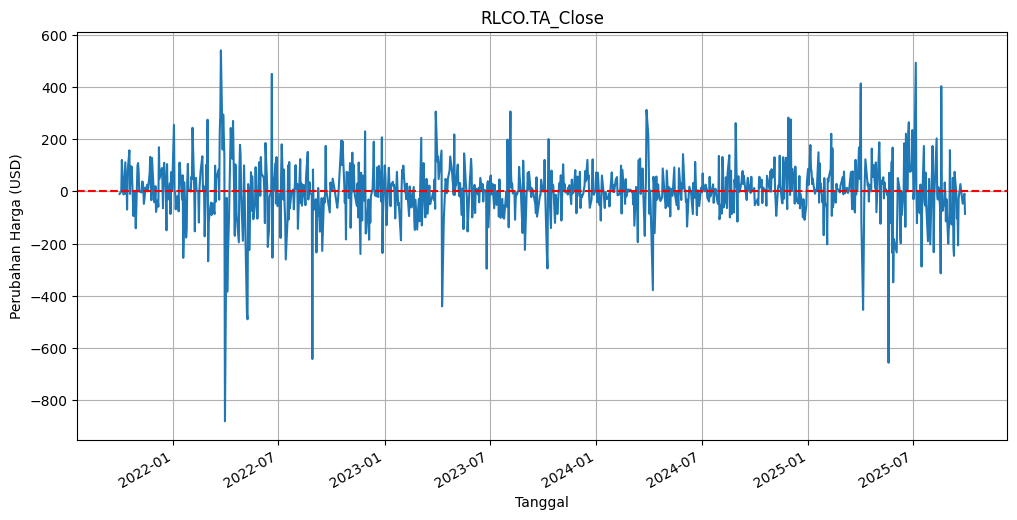

In [18]:
# Membuat plot
import matplotlib.pyplot as plt
df_return_saham = df['RLCO.TA_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
df_return_saham.plot(title='RLCO.TA_Close', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

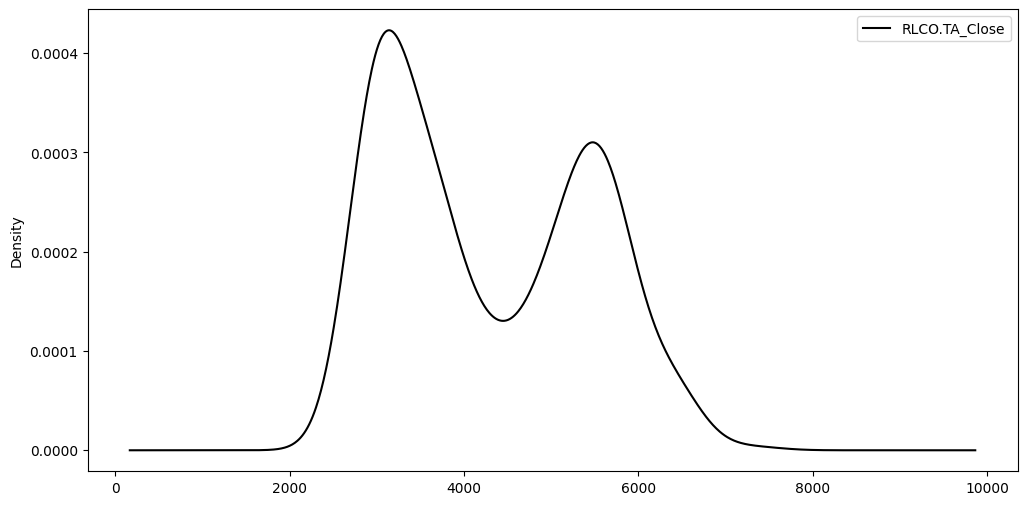

In [20]:
df['RLCO.TA_Close'].plot(kind='kde', color='black',
figsize=(12, 6),
label='RLCO.TA_Close')
plt.legend()

Plot Kernel Density Estimate (KDE) yang menunjukkan distribusi bimodal (dua puncak) pada harga penutupan saham RLCO.TA mengindikasikan bahwa data harga historis cenderung mengelompok di sekitar dua level nilai yang berbeda secara signifikan—yaitu, satu rezim harga rendah (≈3000–4000) dan satu rezim harga tinggi (≈5000–6000). Hal ini menyiratkan adanya pergeseran nilai fundamental yang besar dan permanen pada saham tersebut, kemungkinan dipicu oleh peristiwa korporasi penting, di mana pasar menilai ulang perusahaan, sehingga menciptakan dua "rumah" harga yang stabil, dengan zona di antara keduanya menjadi area transisi yang cepat dan volatil.

<Axes: title={'center': 'Harga Penutupan RLCO.TA Seiring Waktu'}, xlabel='Date'>

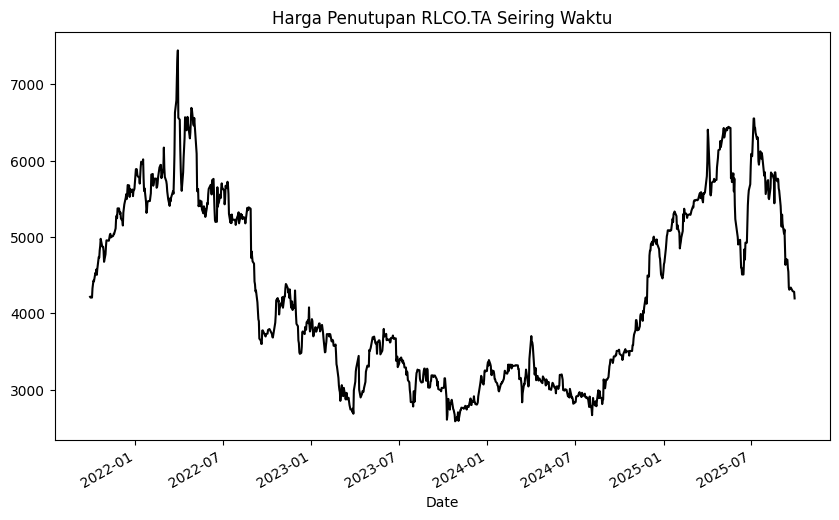

In [26]:
# Direkomendasikan untuk data deret waktu
df['RLCO.TA_Close'].plot(
    kind='line', 
    title='Harga Penutupan RLCO.TA Seiring Waktu', 
    figsize=(10, 6),
    color='black'
)

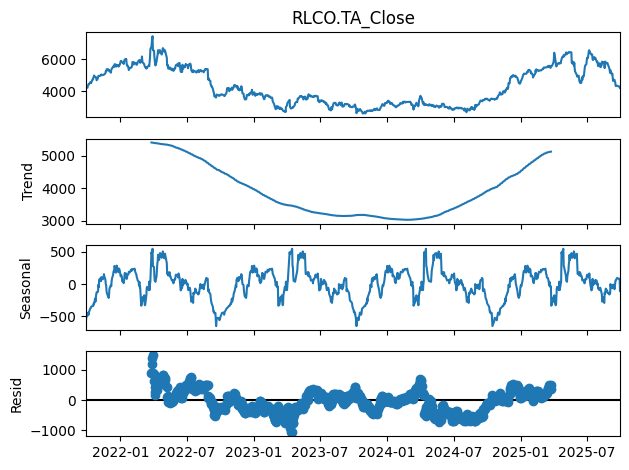

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 252
s_dc = seasonal_decompose(
    df['RLCO.TA_Close'], 
    model='additive', 
    period=period # Tambahkan parameter period
)

# decomp['SDC_Cycle'] = s_dc.seasonal
# decomp['SDC_Trend'] = s_dc.trend
# decomp['SDC_Error'] = s_dc.resid
# decomp[118:122]

# Untuk melihat hasilnya, Anda bisa memanggil .plot()
s_dc.plot()
plt.show()

In [44]:
from statsmodels.tsa.statespace.structural import UnobservedComponents 
uc_model = UnobservedComponents(
    df['RLCO.TA_Close'],
    # Level: 'lltrend' (Local Linear Trend) memiliki level dan slope yang stochastik
    level='lltrend', 
    # Cycle: Tambahkan siklus (periodik)
    cycle=True,
    # Stochastic Cycle: Memungkinkan siklus berubah seiring waktu
    stochastic_cycle=True
)

# Fitting Model: 
# Metode 'powell' adalah salah satu optimizer, tetapi seringkali 'lbfgs' 
# atau 'statespace' lebih disarankan untuk model state space.
# Pengaturan 'disp=False' (atau dihilangkan) akan membuat proses fitting lebih rapi.

res_uc = uc_model.fit(
    method='lbfgs', # Ganti 'powell' dengan 'lbfgs' atau biarkan default jika memungkinkan
    disp=False       # Matikan tampilan proses iterasi
)

# Menampilkan Ringkasan Hasil
print(res_uc.summary())

/home/kevinpnjt/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Unobserved Components Results                         
Dep. Variable:          RLCO.TA_Close   No. Observations:                  989
Model:             local linear trend   Log Likelihood               -6043.751
                   + stochastic cycle   AIC                          12097.501
Date:                Tue, 02 Dec 2025   BIC                          12121.964
Time:                        20:40:58   HQIC                         12106.806
Sample:                             0                                         
                                - 989                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.927e-07    289.581   6.66e-10      1.000    -567.569     567.569
sigma2.level       718.8921    309